# Python: A very brief tour

## David B. Pengra

Everything I know about Python I've learned from reading about it and trying stuff out.  You can do this too. I recommend the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

Below, I give some examples of aspects of Python as a language and a look at some basic tasks done with **NumPy**, **Matplotlib** and **LMFit** packages.


### In Python, everything is an "object"

That means everything has a **type**, has additional data called **attributes** and internal functions called **methods**.  You can see what these are with the `type()`, `help()` and `dir()` functions.

In [3]:
a = -35.4

In [4]:
type(a)

float

In [5]:
# is_integer() is a Boolean method that retirns true if the floating point number 
# could be replaced with an integer without loss of precision.
#
a.is_integer()

False

### Variables are pointers

But, most basic types are "immutable" so you can't tell.  Immutable means it cannot be changed, so if you try to change it, what you really do is reassign the variable to point to a new object.  

In [6]:
b = a
print(b)

-35.4


In [7]:
a = 5
print(a)
print(b)

5
-35.4


### But...

"Mutable" types can change their contents.  The variable "pointer" points to the structure, not the contents of the mutable structure.  This is most relevant with lists. 

In [8]:
numbers = [1,2,3,4,5,6,7,8, 9.5]
numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9.5]

In [9]:
a = numbers
b = a
print("a =", a)
print("b =", b)

a = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]


In [10]:
b[0] = 10
print("a =", a)
print("b =", b)
print("numbers =", numbers)

a = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]
numbers = [10, 2, 3, 4, 5, 6, 7, 8, 9.5]


To save the list no a new variable that will not affect the old list, use the copy() method

In [11]:
numbers = [1,2,3,4,5,6,7,8, 9.5]
a = numbers.copy()
b = a
b[0] = 56.2
print("a =", a)
print("b =", b)
print("numbers =", numbers)

a = [56.2, 2, 3, 4, 5, 6, 7, 8, 9.5]
b = [56.2, 2, 3, 4, 5, 6, 7, 8, 9.5]
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9.5]


### The real action is in Python packages

Every notebook will include **NumPy** and **Matplotlib**

In [12]:
# Usually import packages via a handle to the functions in them using import ... as ...
#
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unc
%matplotlib inline

A NumPy array is really useful. Compare similar operations with the original list.  Numpy arrays allow you to change every element of an array as easily as changing a single vaule.

In [13]:
c = np.array(numbers)
c

array([1. , 2. , 3. , 4. , 5. , 6. , 7. , 8. , 9.5])

In [14]:
numbers[0] = 15.0
print(numbers)
print(c)

[15.0, 2, 3, 4, 5, 6, 7, 8, 9.5]
[1.  2.  3.  4.  5.  6.  7.  8.  9.5]


In [15]:
d = c.view()
d[0] = 25.0
print(c)
print(d)

[25.   2.   3.   4.   5.   6.   7.   8.   9.5]
[25.   2.   3.   4.   5.   6.   7.   8.   9.5]


In [16]:
type(c)

numpy.ndarray

In [17]:
print("numbers * 2 = ", numbers * 2)
print("c ** 2 =", c ** 2)

numbers * 2 =  [15.0, 2, 3, 4, 5, 6, 7, 8, 9.5, 15.0, 2, 3, 4, 5, 6, 7, 8, 9.5]
c ** 2 = [625.     4.     9.    16.    25.    36.    49.    64.    90.25]


Mathematical operations on lists concern concatinations, and in order to work, the operands must be lists.

In [18]:
print("c + 2 =", c + 2)
print("numbers + 2 = ", numbers + 2)

c + 2 = [27.   4.   5.   6.   7.   8.   9.  10.  11.5]


TypeError: can only concatenate list (not "int") to list

NumPy functions will often convert numerical lists into NumPy arrays automatically.

In [19]:
print("sin(c) =", np.sin(c))
print("sin(numbers) =", np.sin(numbers))

sin(c) = [-0.13235175  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825 -0.07515112]
sin(numbers) = [ 0.65028784  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825 -0.07515112]


Look at all of the methods inside a NumPy array!

In [21]:
# help(c)

## Get data into the notebook

There are many ways to enter data for analysis:

1. **Create arrays directly.** This is the quickest if you do not have any computer files (spreadsheets or text files) with the data set you want to analyze already.  But it is the least flexible.  Your life will be easier if you adopt one of the following methods.
2. **Read a text file with `np.loadtxt()`.**  This is a relatively simple function that will read in a single "Comma Separated Value" (CSV) file and store its contents into NumPy arrays.
3. **Read in a CSV file with `pd.read_csv()`.** This works similarly to **loadtxt()** but it is more forgiving of mixed data types.  It also creates a Pandas DataFrame rather than a NumPy array.
4. **Read an Excel file with `pd.read_excel()`.** The Pandas library has some very powerful and easy to use function that can swallow a whole multi-worksheet Excel file in one call.  It makes a Python "dictionary" (type is `dict`) of Pandas DataFrames, with each DataFrame being one Excel sheet.

### Here are some examples using data from a time-of-flight measurement of the speed of light.

In this experiment a pulsed laser diode is bounced off a mirror into a high-speed photodetector.  The laser pulser creates a "trigger" signal that is sunchronized to the light pulses.  The detector picks up the pulses and produces another signal.  As the distance to the detector via the mirror is changed, the time difference between the trigger signal and recieved pulses also changes.  By plotting the distance (measured with a tape measure) versus time difference between the trigger and the detector signal (measured with an oscilloscope) the slope of the line should equal the speed of light.

### Method 1: Enter data directly

Pay close attention to the syntax in the following statements.

In [22]:
#### This will create two NumPy arrays

time_diff = np.array([5.44, 7.84, 11.52, 14.56, 19.24, 29.04, 36.24, 44.24, 49.64, 57.04]) # units = nanoseconds
time_unc = np.array([0.16, 0.16, 0.16, 0.16, 0.40, 0.16, 0.40, 0.40, 0.40, 0.40])
distance = np.array([13.0, 40.188, 80.125, 115.813, 176.375, 290.0, 382.375, 477.125, 540.125, 626.125]) # units = inches
dist_unc = np.array([0.125, 0.125, 0.125, 0.188, 0.25, 0.25, 0.313, 0.375, 0.375, 0.375]) 

In [23]:
import pandas as pd

df = pd.DataFrame()                        # create the empty dataframe
df['Time (ns)'] = time_diff                # create a column "Time (s)" and fill it with time_min2
df['Time_unc (ns)'] = time_unc
df['Distance (in)'] = distance
df['Distance_unc (in)'] = dist_unc

# print the frame as a nice table
df

,Time (ns),Time_unc (ns),Distance (in),Distance_unc (in)
0,5.44,0.16,13.000,0.125
1,7.84,0.16,40.188,0.125
2,11.52,0.16,80.125,0.125
3,14.56,0.16,115.813,0.188
4,19.24,0.40,176.375,0.250
5,29.04,0.16,290.000,0.250
6,36.24,0.40,382.375,0.313
7,44.24,0.40,477.125,0.375
8,49.64,0.40,540.125,0.375
9,57.04,0.40,626.125,0.375


In [24]:
# save data frame to a csv file
df.to_csv('speed_of_light_data.csv', index=False)

In [25]:
# help(df.to_excel)

In [26]:
# save data frame to a csv file
df.to_excel('speed_of_light_data.xlsx', index=False, sheet_name='Data')

### Method 2: read in a CSV file with `np.loadtxt()`

You should study the documentation of any NumPy function that you use.  That is how will learn to solve more challenging coding problems.

In [27]:
# "skiprows" jumps over the row with the column headings.
# The default delimiter is a space, by a CSV file uses commas
#
# YOU NEED TO HAVE A CSV DATA FILE TO RUN THIS
#
SoL_data = np.loadtxt("speed_of_light_data.csv",delimiter=',',skiprows=1)
SoL_data # This prints out a default listing of what is read in, in this case, a 2d array.

array([[5.44000e+00, 1.60000e-01, 1.30000e+01, 1.25000e-01],
       [7.84000e+00, 1.60000e-01, 4.01880e+01, 1.25000e-01],
       [1.15200e+01, 1.60000e-01, 8.01250e+01, 1.25000e-01],
       [1.45600e+01, 1.60000e-01, 1.15813e+02, 1.88000e-01],
       [1.92400e+01, 4.00000e-01, 1.76375e+02, 2.50000e-01],
       [2.90400e+01, 1.60000e-01, 2.90000e+02, 2.50000e-01],
       [3.62400e+01, 4.00000e-01, 3.82375e+02, 3.13000e-01],
       [4.42400e+01, 4.00000e-01, 4.77125e+02, 3.75000e-01],
       [4.96400e+01, 4.00000e-01, 5.40125e+02, 3.75000e-01],
       [5.70400e+01, 4.00000e-01, 6.26125e+02, 3.75000e-01]])

In [28]:
# Extract columns of the of the 2d array.  
SoL_time = SoL_data[:,0]
SoL_dist = SoL_data[:,2]
print(SoL_dist)

[ 13.     40.188  80.125 115.813 176.375 290.    382.375 477.125 540.125
 626.125]


### Method 3: read in a CSV file with `pd.read_csv()`

The data structure returned from this is more complex.  It is a Pandas "DataFrame."  Each DataFrame is like a 2D array, but the data type of the whole DataFrame is not fixed to one type, unlike for NumPy arrays.  But the command is very easy to use.

In [29]:
# First, import the Pandas package
import pandas as pd

# YOU NEED TO HAVE A CSV DATA FILE TO RUN THIS
#
SoL_df = pd.read_csv("speed_of_light_data.csv")
SoL_df # Notice the nice formatting of the data table

,Time (ns),Time_unc (ns),Distance (in),Distance_unc (in)
0,5.44,0.16,13.000,0.125
1,7.84,0.16,40.188,0.125
2,11.52,0.16,80.125,0.125
3,14.56,0.16,115.813,0.188
4,19.24,0.40,176.375,0.250
5,29.04,0.16,290.000,0.250
6,36.24,0.40,382.375,0.313
7,44.24,0.40,477.125,0.375
8,49.64,0.40,540.125,0.375
9,57.04,0.40,626.125,0.375


In [30]:
# Columns may be directly accessed as follows
SoL_df['Time (ns)']

0     5.44
1     7.84
2    11.52
3    14.56
4    19.24
5    29.04
6    36.24
7    44.24
8    49.64
9    57.04
Name: Time (ns), dtype: float64

### Method 4: read in an Excel file with `pd.read_excel()`

This is useful if you have a lot of data in multi-worksheet spreadsheet file that you would like to import all at once.  It creates Python "dict" (a.k.a. "dictionary") whose entries are Pandas "DataFrames".  Notice the code below that will print each worksheet.

In [31]:
# "sheet_name" allows you to specify which sheet to read in.  Setting it to "None"
#     reads in all sheets
# If you do not specify a sheet_name, you will only get the first sheet
#
# YOU NEED TO HAVE An EXCEL (.xlsx) DATA FILE TO RUN THIS
#
SoL_data = pd.read_excel("speed_of_light_data.xlsx", sheet_name=None)
for item in SoL_data:
    print('Sheet name: ',item)
    print(SoL_data[item])

Sheet name:  Data
   Time (ns)  Time_unc (ns)  Distance (in)  Distance_unc (in)
0       5.44           0.16         13.000              0.125
1       7.84           0.16         40.188              0.125
2      11.52           0.16         80.125              0.125
3      14.56           0.16        115.813              0.188
4      19.24           0.40        176.375              0.250
5      29.04           0.16        290.000              0.250
6      36.24           0.40        382.375              0.313
7      44.24           0.40        477.125              0.375
8      49.64           0.40        540.125              0.375
9      57.04           0.40        626.125              0.375


In [32]:
# Extract columns from the first worksheet (called 'Data').  

time = SoL_data['Data']['Time (ns)']
distance = SoL_data['Data']['Distance (in)']

## A simple plot with a simple fit

Very basic - like Excel ***trendline***

First, plot the raw data.

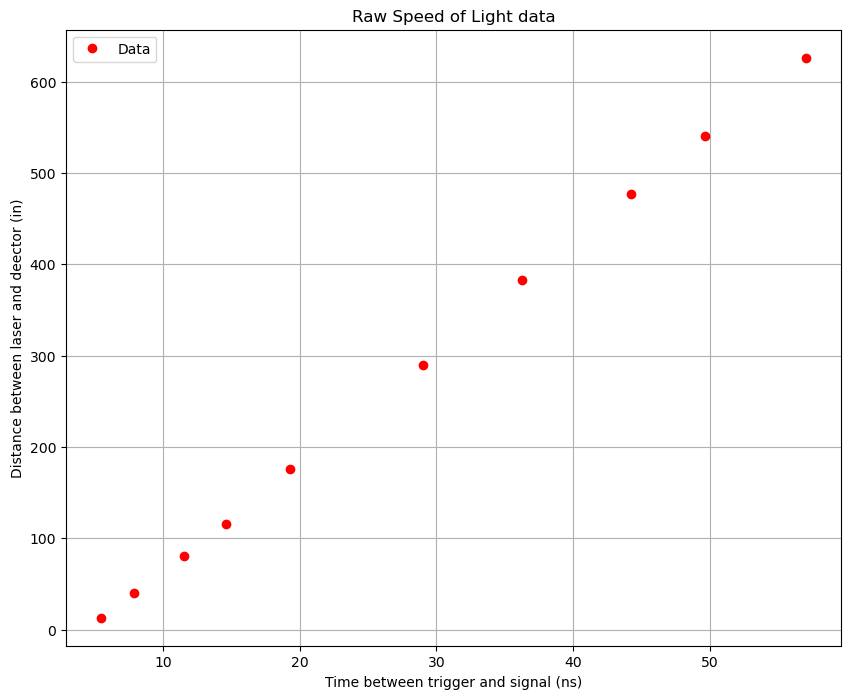

In [33]:
# Look at each line below.  What does each line do?
#
plt.figure(figsize=(10,8))
plt.plot(time,distance,'ro',label="Data")
plt.grid(True)
plt.xlabel('Time between trigger and signal (ns)')
plt.ylabel('Distance between laser and deector (in)')
plt.title("Raw Speed of Light data")
plt.legend();

The slope of this line should be close to the speed of light in a vacuum.  But the units are inches and nanoseconds.  Convert the data to meters and seconds.  This can be done in a single line of code for each array, thanks to NumPy array operations.


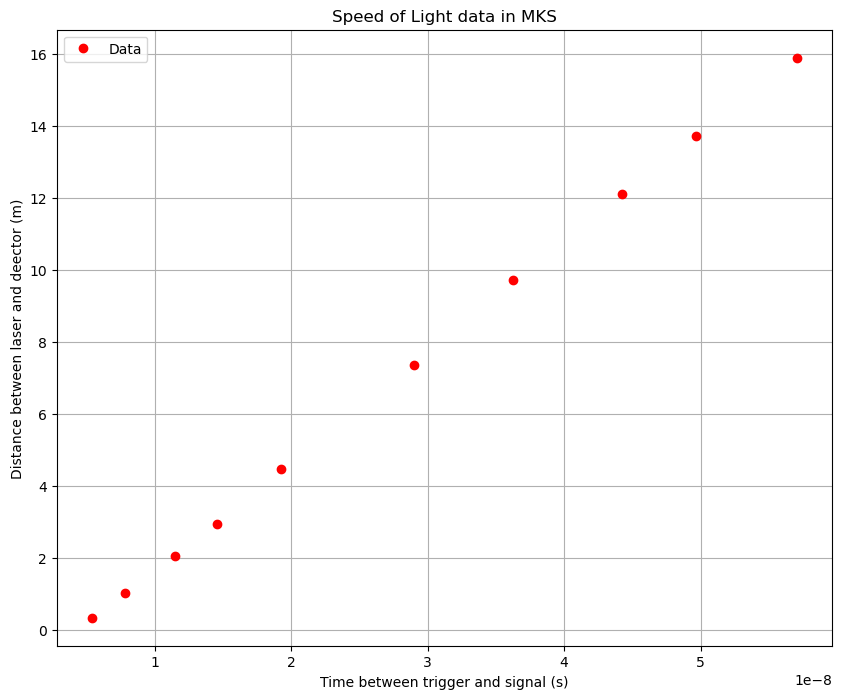

In [34]:
# Notice how you can take the sine of the whole array at once

distance_m = distance*2.54*1e-2 # an inch = 2.54 cm exactly. There are 100cm in 1 m 
time_s = time*1e-9 # 1 nanosecond is 1 times 10^{-9} seconds

# Now plot this:
plt.figure(figsize=(10,8))
plt.plot(time_s,distance_m,'ro',label="Data")
plt.grid(True)
plt.xlabel('Time between trigger and signal (s)')
plt.ylabel('Distance between laser and deector (m)')
plt.title("Speed of Light data in MKS")
plt.legend();

### Fit a line

Very basic.  Later we'll use something much more powerful.

In [35]:
# The first line does a fit, and returns the fitting coefficients
#
my_coeff = np.polyfit(time_s,distance_m,1) # This fits a line (degree-1 polynomial)
#
print(my_coeff)
print('Intercept = {:.4f}'.format(my_coeff[1]))
print('Slope = {:.4g}'.format(my_coeff[0]))


[ 3.04308012e+08 -1.39960664e+00]
Intercept = -1.3996
Slope = 3.043e+08


In [36]:
# The poly1d function uses the coefficients and creates a function of them
#
cal = np.poly1d(my_coeff)  # This makes a polynomial function from the coefficients
print(np.poly1d(cal))


 
3.043e+08 x - 1.4


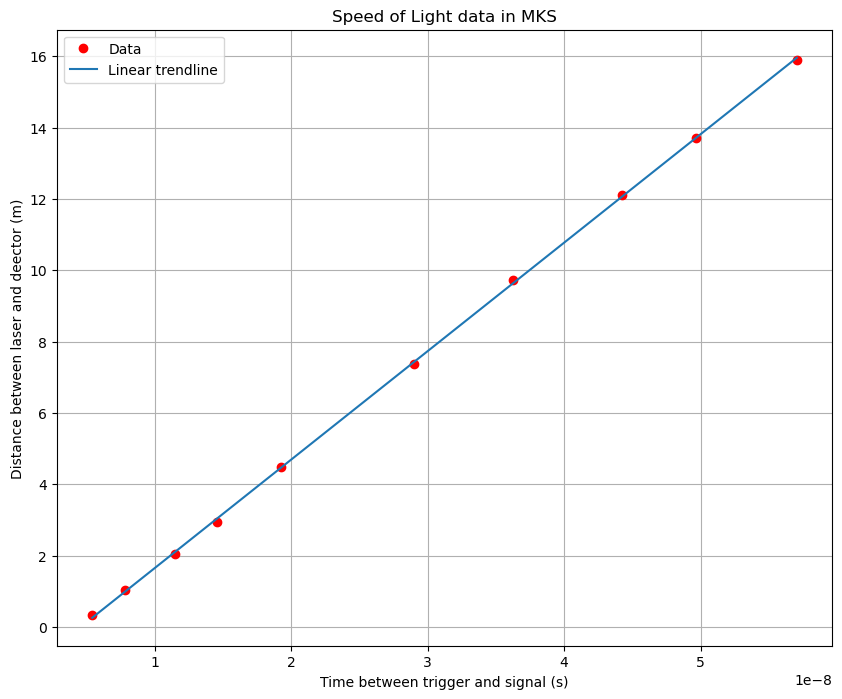

In [37]:
# Now we can add a fitline
#
plt.figure(figsize=(10,8))
plt.plot(time_s,distance_m,'ro',label="Data")
plt.plot(time_s,cal(time_s),'-',label="Linear trendline")
plt.grid(True)
plt.xlabel('Time between trigger and signal (s)')
plt.ylabel('Distance between laser and deector (m)')
plt.title("Speed of Light data in MKS")
plt.legend();



## Plot with errorbars

Errorbars are easy to add to a plot.  Just use the `plt.errorbar()` function.  See below for how it is used.  Note that we need to change the units in the errorbars as well as the data for them to be plotted correctly.

In [38]:
time_unc = SoL_data['Data']['Time_unc (ns)']
distance_unc = SoL_data['Data']['Distance_unc (in)']

distance_unc_m = distance_unc*2.54*1e-2 # an inch = 2.54 cm exactly. There are 100cm in 1 m 
time_unc_s = time_unc*1e-9 # 1 nanosecond is 1 times 10^{-9} seconds

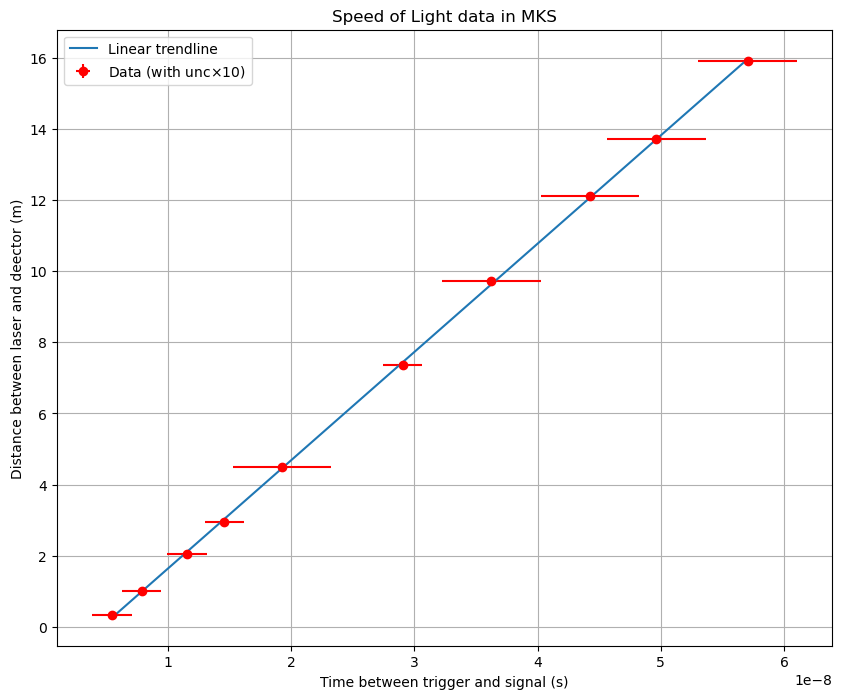

In [45]:
# Now we can add a fitline
#
plt.figure(figsize=(10,8))
plt.errorbar(time_s, distance_m, yerr=distance_unc_m*10, xerr=time_unc_s*10, fmt='ro', label=r'Data (with unc$\times 10$)')
plt.plot(time_s,cal(time_s),'-',label="Linear trendline")
plt.grid(True)
plt.xlabel('Time between trigger and signal (s)')
plt.ylabel('Distance between laser and deector (m)')
plt.title("Speed of Light data in MKS")
plt.legend();


Notice that in the above, the time uncertainty dominates.  If we want the line fit to be weighted properly we would need to calculate an overall uncertainty on each data point.  The way to do this is to covert all uncertainty to "y" uncertainty by the following procedure, based on uncertainty propagation.  The functional form of the fit equation is $y=Mx+B$.  With this function, the uncertainty in $x$ can be used to estimate the uncertainty it contriibutes to the uncertainty in $y$ through the equation
$$ \sigma_{y(x)}^2 = \left(\frac{dy}{dx}\right)^2\sigma_x^2 $$

and the derivative here is simply the slope $M$.  So we get an uncertainty in $y$ due to and uncertainty in $x$ via
$$ \sigma_{y(x)}^2 = M^2\sigma_x^2 .$$

We then add this to the original uncertainty in the $y$ data by adding in "quadrature" (i.e., "square root of the sum of the squares").  The revised uncertaity $\sigma_y^{\prime}$ for the data is then
$$ \sigma_y^{\prime} = \sqrt{\sigma_y^2 + \sigma_{y(x)}^2} = \sqrt{\sigma_y^2 + M^2\sigma_{x}^2} $$

Lets carry out this transformation and replot:

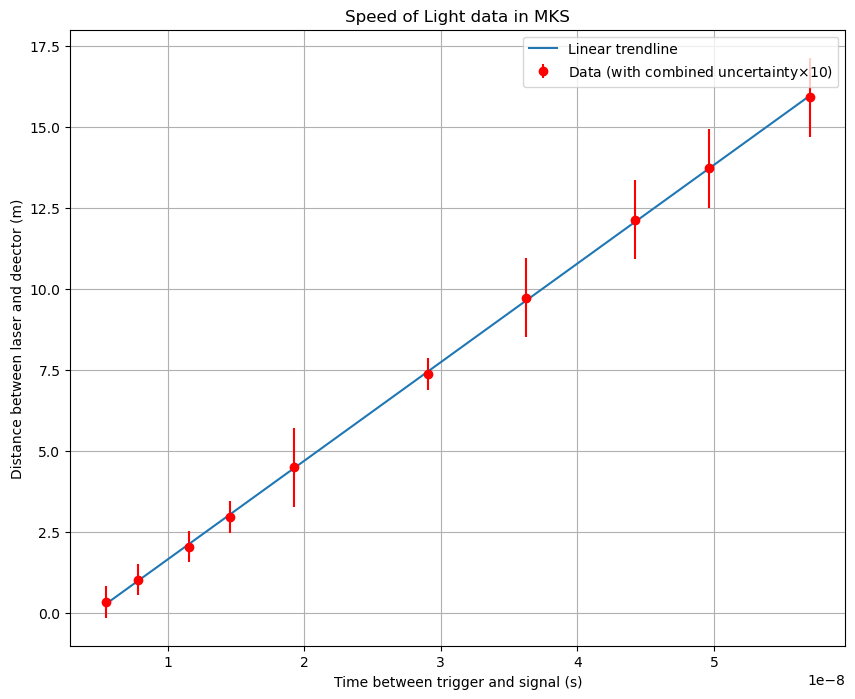

In [49]:
sigma_y_prime = np.sqrt(distance_unc_m**2 + (my_coeff[0]**2)*time_unc_s**2)

# Now we can add a fitline
#
plt.figure(figsize=(10,8))
plt.errorbar(time_s, distance_m, yerr=sigma_y_prime*10, fmt='ro', label=r'Data (with combined uncertainty$\times 10$)')
plt.plot(time_s,cal(time_s),'-',label="Linear trendline")
plt.grid(True)
plt.xlabel('Time between trigger and signal (s)')
plt.ylabel('Distance between laser and detector (m)')
plt.title("Speed of Light data in MKS")
plt.legend();

## Fit a line using LMFit

LMFit is a very powerful line fitting package that does an especially good job handing data and fit uncertainties.  You should get used to using it because even though running a simple line fit is a little bit more complicated than what is shown above, you can also run much more elaborate fits by making only a few adjustments to the basic procedure.

### Models: the basis of LMFit

LMFit provides a large number of pre-made model functions with predefined parameters. 

To **call a pre-made model**, use:

- `from lmfit.models import ModelFromList` 

where `ModelFromList` may be one or more of the following.  The actual functions and the names of the parameters are also given below.

  - `LinearModel()`
     - $f(x;m,b)=mx+b$
     - m is called 'slope';  b= 'intercept'
  - `QuadraticModel()`
     - $f(x;a,b,c)=ax^2+bx+c$
     - parameters called 'a', 'b', 'c'
  - `PolynomialModel(N)`	polynomial of order N
     - $f(x,;c_0,c_1,c_2,…c_N)=c_0+c_1 x+c_2 x^2+⋯+c_N x^N$
     - parameters called c0, c1, c2, … cN

Think of this as bringing in these as the equivalent of a user-defined function.  To have more than one, you would use:

- `from lmfit.models import LinearModel, QuadraticModel`

There are many more models available, such as peaks, power-law, and logarithmic functions, etc. You can also create and use your own model.  To see examples of these see the extensive examples created by Prof. Olmstead in another notebook.

Then you must creat an instance of the model that has been imported:

- `line0 = LinearModel()` to fit a line to your data

To run the fit, you must first establish starting points for the fit parameters.  For line, polynomials and other realtively simple functions, there is an additional method in the model called `guess()`.  To use this, create parameters with starting values by this line:

- `param_guess = line0.guess(ydata, x=xdata)` where `ydata` is the y-value array and `xdata` is the x-value array. 

Then, to run the fit, you invoke the `fit()` method in the model, and save the results into a **Parameters** object:

- `line_fit0 = line0.fit(ydata, param_guess, x=xdata)` makes the fit and saves the results.

Finally to obtain the values of the parameters, information about how good the fit was, and to make a plot of the fit and data, run the `fit_report()` and `plot()` methods:

- `print(line_fit0.fit_report())` to print out the fit results.
- `line_fit0.plot()` to make a quick plot.

Here is everything needed to do this on the data treated above:

In [50]:
# Import the model.
# You only do this once in a notebook
from lmfit.models import LinearModel

In [51]:
# Make an instance of the model
line0 = LinearModel()

# Create the parameters and guess their starting values
param_guess = line0.guess(distance_m, x=time_s)

# Fit the line, and print the results
line_fit0 = line0.fit(distance_m, param_guess, x=time_s)
line_fit0

### Include uncertainties (error bars) 

LMFit can easily handle uncertainties in the data set to weight the fit.  From above, we have ranges of where the notes may lie from half the range of each node location.  We can use these to improve our knowledge of the fit quality. We modify the `fit()` call with a `weights` array equal to the inverse of the uncertanity.

In [52]:
# Fit the line, and print the results with weights
line_fit1 = line0.fit(distance_m, param_guess, x=time_s, weights=1/sigma_y_prime)
line_fit1

Finally, make a plot.

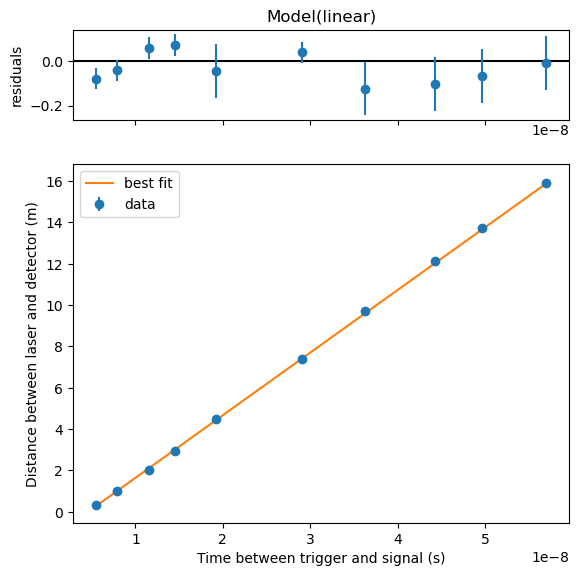

In [53]:
line_fit1.plot()
plt.xlabel('Time between trigger and signal (s)')
plt.ylabel('Distance between laser and detector (m)');

Notice that if you do not include the weights, you do not get error bars on the plot.  `line_fit0` did not include weights:

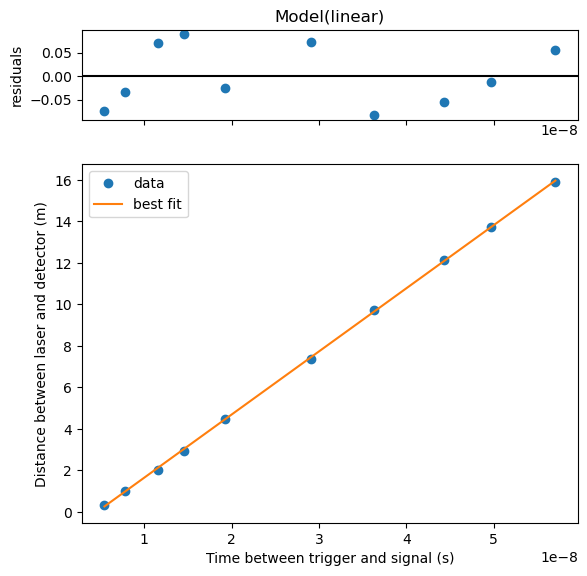

In [54]:
line_fit0.plot()
plt.xlabel('Time between trigger and signal (s)')
plt.ylabel('Distance between laser and detector (m)');

## Print a number with uncertainty

The easiest way to correctly print a calculated value with uncertainty is to creat an "uncertainty object" with the **Uncertainties** package.  Here is how to correctly print the measurement for the speed of light:

In [59]:
# The uncertainty is calculated by LMFit

unc_speed_of_light = unc.ufloat(line_fit1.params['slope'].value, line_fit1.params['slope'].stderr)

print(' The measured speed of light = {:.2uP} m/s'.format(unc_speed_of_light))

 The measured speed of light = (3.032±0.017)×10⁸ m/s
